In [181]:
import pandas as pd
import numpy as np

In [182]:
df = pd.read_csv('heart.csv')

In [183]:
df

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [184]:
df.isnull().sum()

age                    0
sex                    0
chest_pain_type        0
resting_bp             0
cholestoral            0
fasting_blood_sugar    0
restecg                0
max_hr                 0
exang                  0
oldpeak                0
slope                  0
num_major_vessels      0
thal                   0
target                 0
dtype: int64

In [185]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('target',axis=1), df['target'], test_size=0.30, random_state=101)


In [186]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
    

StandardScaler()

In [187]:
X_train = scaler.transform(X_train)

In [188]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)
    

In [189]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=9)

In [190]:
#No of class labels
knn.classes_


array([0, 1])

In [191]:
#Counting no of 0's and 1's in test data
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0: 44, 1: 47}

In [192]:
from sklearn.metrics import classification_report,confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


[[43  1]
 [35 12]]
              precision    recall  f1-score   support

           0       0.55      0.98      0.70        44
           1       0.92      0.26      0.40        47

    accuracy                           0.60        91
   macro avg       0.74      0.62      0.55        91
weighted avg       0.74      0.60      0.55        91



/home/harsh/Main/ML College/.venv/lib/python3.10/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [193]:
accuracy = knn.score(X_test, y_test)

/home/harsh/Main/ML College/.venv/lib/python3.10/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [194]:
accuracy 

0.6043956043956044

/home/harsh/Main/ML College/.venv/lib/python3.10/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/home/harsh/Main/ML College/.venv/lib/python3.10/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/home/harsh/Main/ML College/.venv/lib/python3.10/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/home/harsh/Main/ML College/.venv/lib/python3.10/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/home/harsh/Main/ML College/.venv/lib/python3.10/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/home/harsh/Main/ML College/.venv/l

Text(0, 0.5, 'Error Rate')

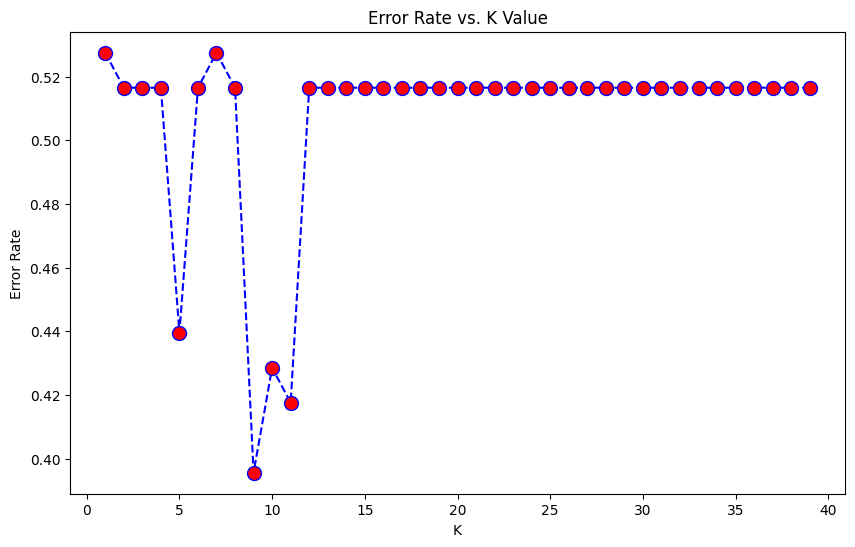

In [195]:
import matplotlib.pyplot as plt
error_rate = []

for i in range(1,40):
        
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train,y_train)
        pred_i = knn.predict(X_test)
        
        error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel("Error Rate")


In [ ]:
#AUTOMOBILE DATASET

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('C:\\Users\\Atharva\\Downloads\\Automobile_data(1).csv')

In [4]:
df

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0
...,...,...,...,...,...,...,...,...,...,...
56,81,volkswagen,sedan,97.3,171.7,ohc,four,85,27,7975.0
57,82,volkswagen,sedan,97.3,171.7,ohc,four,52,37,7995.0
58,86,volkswagen,sedan,97.3,171.7,ohc,four,100,26,9995.0
59,87,volvo,sedan,104.3,188.8,ohc,four,114,23,12940.0


In [5]:
X = df.iloc[:, 1:-1].values
y = df[["price"]]

In [6]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 0] = le.fit_transform(X[:, 0])


In [7]:
X

array([[0, 'convertible', 88.6, 168.8, 'dohc', 'four', 111, 21],
       [0, 'convertible', 88.6, 168.8, 'dohc', 'four', 111, 21],
       [0, 'hatchback', 94.5, 171.2, 'ohcv', 'six', 154, 19],
       [1, 'sedan', 99.8, 176.6, 'ohc', 'four', 102, 24],
       [1, 'sedan', 99.4, 176.6, 'ohc', 'five', 115, 18],
       [1, 'sedan', 99.8, 177.3, 'ohc', 'five', 110, 19],
       [1, 'wagon', 105.8, 192.7, 'ohc', 'five', 110, 19],
       [2, 'sedan', 101.2, 176.8, 'ohc', 'four', 101, 23],
       [2, 'sedan', 101.2, 176.8, 'ohc', 'four', 101, 23],
       [2, 'sedan', 101.2, 176.8, 'ohc', 'six', 121, 21],
       [2, 'sedan', 103.5, 189.0, 'ohc', 'six', 182, 16],
       [2, 'sedan', 103.5, 193.8, 'ohc', 'six', 182, 16],
       [2, 'sedan', 110.0, 197.0, 'ohc', 'six', 182, 15],
       [3, 'hatchback', 88.4, 141.1, 'l', 'three', 48, 47],
       [3, 'hatchback', 94.5, 155.9, 'ohc', 'four', 70, 38],
       [3, 'sedan', 94.5, 158.8, 'ohc', 'four', 70, 38],
       [4, 'hatchback', 93.7, 157.3, 'ohc', 'fo

In [8]:
X[:, 1] = le.fit_transform(X[:, 1])

In [9]:
X

array([[0, 0, 88.6, 168.8, 'dohc', 'four', 111, 21],
       [0, 0, 88.6, 168.8, 'dohc', 'four', 111, 21],
       [0, 2, 94.5, 171.2, 'ohcv', 'six', 154, 19],
       [1, 3, 99.8, 176.6, 'ohc', 'four', 102, 24],
       [1, 3, 99.4, 176.6, 'ohc', 'five', 115, 18],
       [1, 3, 99.8, 177.3, 'ohc', 'five', 110, 19],
       [1, 4, 105.8, 192.7, 'ohc', 'five', 110, 19],
       [2, 3, 101.2, 176.8, 'ohc', 'four', 101, 23],
       [2, 3, 101.2, 176.8, 'ohc', 'four', 101, 23],
       [2, 3, 101.2, 176.8, 'ohc', 'six', 121, 21],
       [2, 3, 103.5, 189.0, 'ohc', 'six', 182, 16],
       [2, 3, 103.5, 193.8, 'ohc', 'six', 182, 16],
       [2, 3, 110.0, 197.0, 'ohc', 'six', 182, 15],
       [3, 2, 88.4, 141.1, 'l', 'three', 48, 47],
       [3, 2, 94.5, 155.9, 'ohc', 'four', 70, 38],
       [3, 3, 94.5, 158.8, 'ohc', 'four', 70, 38],
       [4, 2, 93.7, 157.3, 'ohc', 'four', 68, 31],
       [4, 2, 93.7, 157.3, 'ohc', 'four', 68, 31],
       [5, 4, 96.5, 157.1, 'ohc', 'four', 76, 30],
       [5, 3, 

In [10]:
X[:, 5] = le.fit_transform(X[:, 5])

In [11]:
X

array([[0, 0, 88.6, 168.8, 'dohc', 2, 111, 21],
       [0, 0, 88.6, 168.8, 'dohc', 2, 111, 21],
       [0, 2, 94.5, 171.2, 'ohcv', 3, 154, 19],
       [1, 3, 99.8, 176.6, 'ohc', 2, 102, 24],
       [1, 3, 99.4, 176.6, 'ohc', 1, 115, 18],
       [1, 3, 99.8, 177.3, 'ohc', 1, 110, 19],
       [1, 4, 105.8, 192.7, 'ohc', 1, 110, 19],
       [2, 3, 101.2, 176.8, 'ohc', 2, 101, 23],
       [2, 3, 101.2, 176.8, 'ohc', 2, 101, 23],
       [2, 3, 101.2, 176.8, 'ohc', 3, 121, 21],
       [2, 3, 103.5, 189.0, 'ohc', 3, 182, 16],
       [2, 3, 103.5, 193.8, 'ohc', 3, 182, 16],
       [2, 3, 110.0, 197.0, 'ohc', 3, 182, 15],
       [3, 2, 88.4, 141.1, 'l', 4, 48, 47],
       [3, 2, 94.5, 155.9, 'ohc', 2, 70, 38],
       [3, 3, 94.5, 158.8, 'ohc', 2, 70, 38],
       [4, 2, 93.7, 157.3, 'ohc', 2, 68, 31],
       [4, 2, 93.7, 157.3, 'ohc', 2, 68, 31],
       [5, 4, 96.5, 157.1, 'ohc', 2, 76, 30],
       [5, 3, 96.5, 175.4, 'ohc', 2, 101, 24],
       [5, 3, 96.5, 169.1, 'ohc', 2, 100, 25],
       [6, 

In [12]:
X[:, 4] = le.fit_transform(X[:, 4])

In [13]:
X

array([[0, 0, 88.6, 168.8, 0, 2, 111, 21],
       [0, 0, 88.6, 168.8, 0, 2, 111, 21],
       [0, 2, 94.5, 171.2, 5, 3, 154, 19],
       [1, 3, 99.8, 176.6, 3, 2, 102, 24],
       [1, 3, 99.4, 176.6, 3, 1, 115, 18],
       [1, 3, 99.8, 177.3, 3, 1, 110, 19],
       [1, 4, 105.8, 192.7, 3, 1, 110, 19],
       [2, 3, 101.2, 176.8, 3, 2, 101, 23],
       [2, 3, 101.2, 176.8, 3, 2, 101, 23],
       [2, 3, 101.2, 176.8, 3, 3, 121, 21],
       [2, 3, 103.5, 189.0, 3, 3, 182, 16],
       [2, 3, 103.5, 193.8, 3, 3, 182, 16],
       [2, 3, 110.0, 197.0, 3, 3, 182, 15],
       [3, 2, 88.4, 141.1, 2, 4, 48, 47],
       [3, 2, 94.5, 155.9, 3, 2, 70, 38],
       [3, 3, 94.5, 158.8, 3, 2, 70, 38],
       [4, 2, 93.7, 157.3, 3, 2, 68, 31],
       [4, 2, 93.7, 157.3, 3, 2, 68, 31],
       [5, 4, 96.5, 157.1, 3, 2, 76, 30],
       [5, 3, 96.5, 175.4, 3, 2, 101, 24],
       [5, 3, 96.5, 169.1, 3, 2, 100, 25],
       [6, 3, 94.3, 170.7, 3, 2, 78, 24],
       [6, 3, 94.5, 155.9, 3, 2, 70, 38],
       [6, 3

In [15]:
#Handling missing data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
y = imputer.fit_transform(y)

In [16]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [17]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=5)
reg.fit(X_train,y_train)

KNeighborsRegressor()

In [18]:
from sklearn.metrics import r2_score
y_pred = reg.predict(x_test)


In [19]:
r2_score(y_test,y_pred)

0.4400571609601187